In [1]:
import requests
import datetime
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
class Plotgraph:
    
    # setting the value for initializer
    
    def __init__(self, convert_from, convert_to, limit,timeframe):
        
        self.convert_from = convert_from
        self.convert_to = convert_to
        self.limit = limit
        if timeframe == 'minute':
            self.timeframe = 'histominute'
        else:
            self.timeframe = 'histohour'

        self.end_point = 'https://min-api.cryptocompare.com/data/{}?fsym={}&tsym={}&limit={}' \
            .format(self.timeframe, self.convert_from.upper(), self.convert_to.upper(), self.limit)

    def get_data(self):
            response = requests.get(self.end_point)
            data = response.json()['Data']
            dataFrame = pd.DataFrame(data)
            dataFrame['timestamp'] = [datetime.datetime.fromtimestamp(d) for d in dataFrame.time]
            return dataFrame

    def plot_price(self):
        data = self.get_data()
        fg = plt.figure(figsize=(10, 10))
        plt.plot(data.timestamp, data.high)
        plt.title("Showing data in " + timeframe +" Time Of " + self.convert_from + ' in ' + self.convert_to  , fontsize=20)
        plt.ylabel('Price In ' + self.convert_to, fontsize=15)
        plt.xlabel('Year', fontsize=15)
        plt.show()

Enter the Cypto Currency (BTC,ETC,etc): ETC
Enter the Currency You Need To Convert To (PKR,USD,etc): PKR
Enter the Limited Data You Need To Get (10,20,60,100 etc) 20
Hourly or Minute Wise data? (hourly,minute): hourly
loading


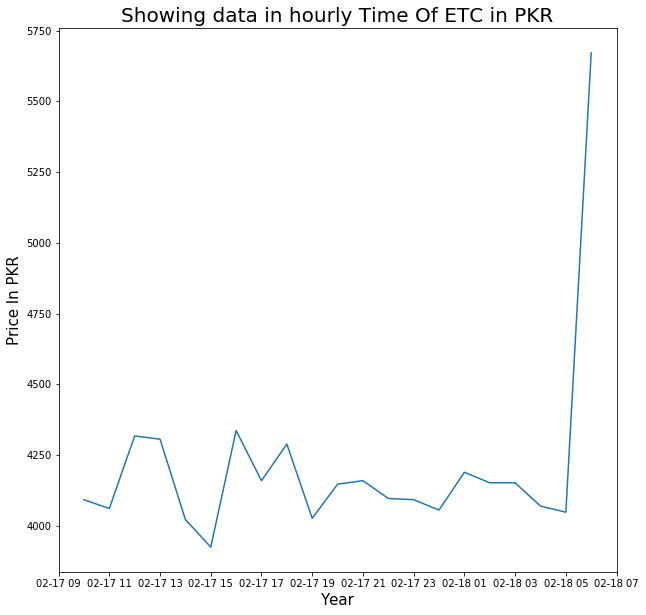

In [3]:
# Geting Data Input from User ..
convert_from = input("Enter the Cypto Currency (BTC,ETC,etc): ")
convert_to = input("Enter the Currency You Need To Convert To (PKR,USD,etc): ")
limit = int(input("Enter the Limited Data You Need To Get (10,20,60,100 etc) "))
timeframe = input("Hourly or Minute Wise data? (hourly,minute): ")
# end
print('loading')
PLoting_data = Plotgraph(convert_from, convert_to, limit, timeframe)
PLoting_data.plot_price()